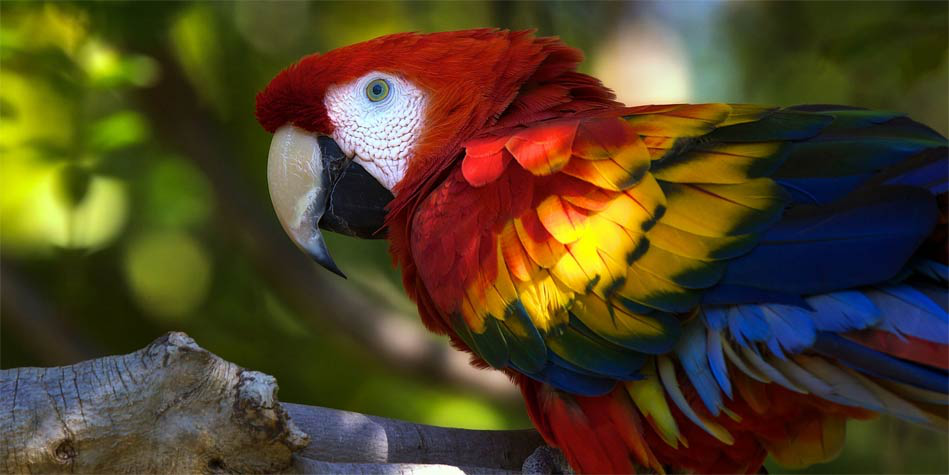

In [22]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


path="./papuga.jpg"
img = Image.open(path)

display(img)

arr = np.array(img)

475


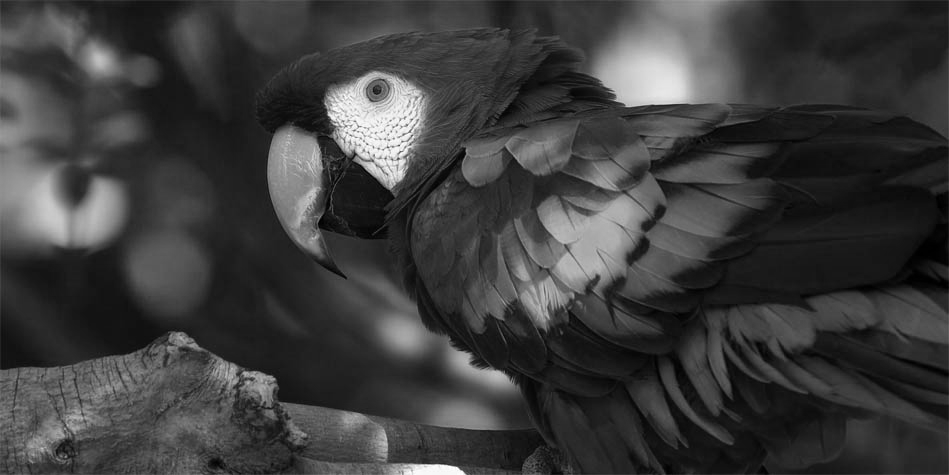

In [23]:
def RGBtoGSsavg(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = sum(RGB[i][j])/3.
    
    return RGB2

img = Image.fromarray(RGBtoGSsavg(arr), 'L')
display(img)

475


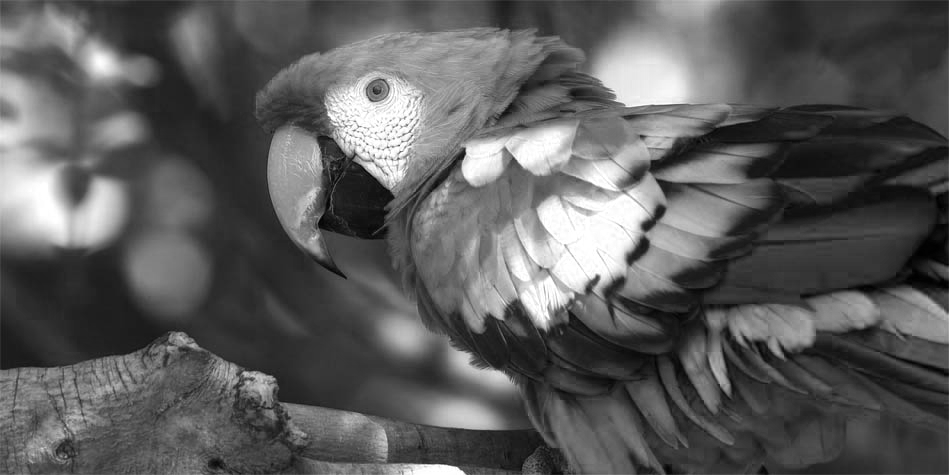

In [24]:
def RGBtoGSmax(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = max(RGB[i][j])
    
    return RGB2

img = Image.fromarray(RGBtoGSmax(arr), 'L')
display(img)

475


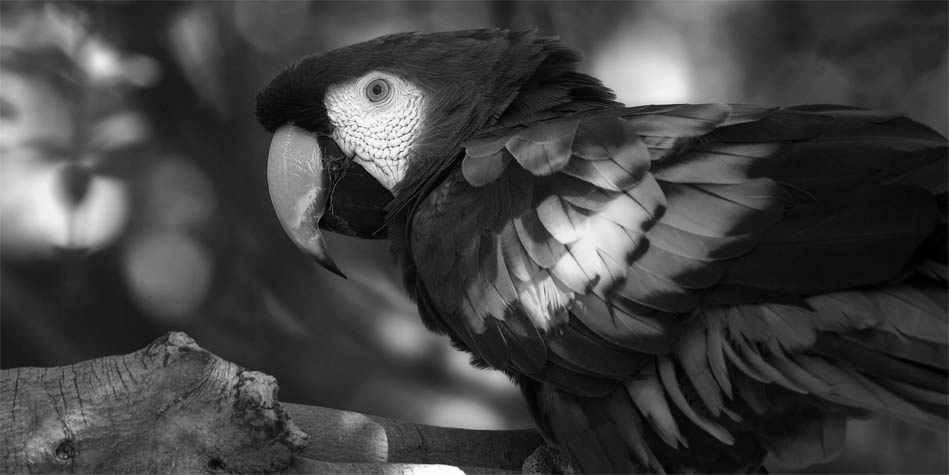

In [25]:
#percieved luminance correction

def RGBtoGSplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.2126 * RGB[i][j][0] + 0.7152 * RGB[i][j][1] + 0.0722 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSplum(arr), 'L')
display(img)

475


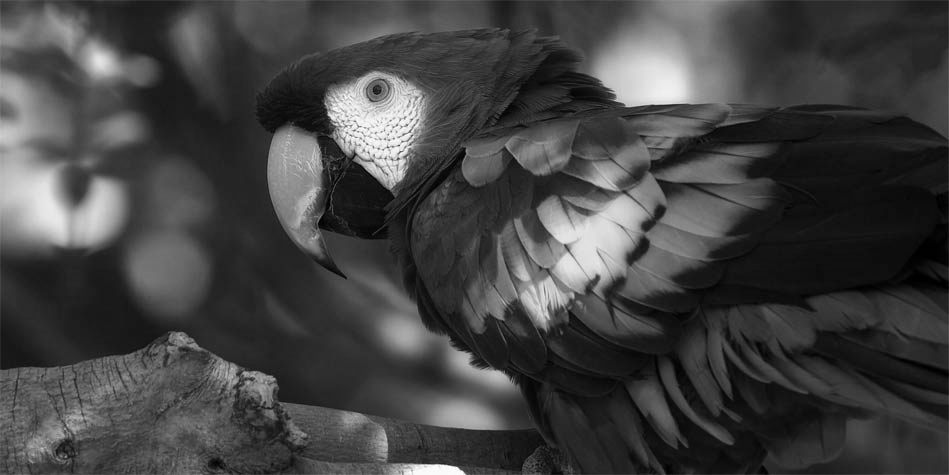

In [26]:
#linear approximation of gamma and percieved lumminance correction

def RGBtoGSlgplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSlgplum(arr), 'L')
display(img)

475


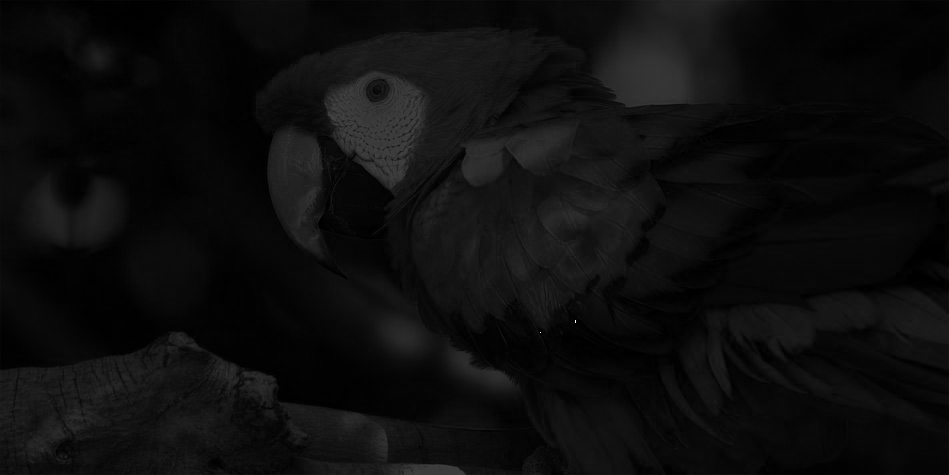

In [27]:
#podejrzana metoda z przejściem przez CIELUV/korekta do artykułu

def RGBtoGSSaravanan(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            Y = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
            U = (RGB[i][j][2] - Y) * 0.565
            V = (RGB[i][j][0] - Y) * 0.713
            UV = U + V
            R1 = RGB[i][j][0] * 0.299
            R2 = RGB[i][j][0] * 0.587            
            R3 = RGB[i][j][0] * 0.114 
            G1 = RGB[i][j][1] * 0.299
            G2 = RGB[i][j][1] * 0.587
            G3 = RGB[i][j][1] * 0.114
            B1 = RGB[i][j][2] * 0.299
            B2 = RGB[i][j][2] * 0.587
            B3 = RGB[i][j][0] * 0.114;
            R4 = (R1 + R2 + R3) / 3
            G4 = (G1 + G2 + G3) / 3
            B4 = (B1 + B2 + B3) / 3
            RGB2 [i][j] = (R4 + G4 + B4 + UV)/4
            
    return RGB2

img = Image.fromarray(RGBtoGSSaravanan(arr), 'L')
display(img)

In [29]:
def histogramRGBz2(filePath):
    img = None
    if isinstance(filePath, str):
        img = Image.open(filePath)
    if isinstance(filePath, Image.Image):
        img = filePath
    RGB = np.array(img)
    #print(RGB)
    R = np.zeros(256)
    G = np.zeros(256)
    B = np.zeros(256)
    
    for i in RGB:
        for j in i:
            R[j[0]]+=1
            G[j[1]]+=1
            B[j[2]]+=1
    
    return (R, G, B)


In [40]:
def histogramRGBz2GREY(filePath):
    img = None
    if isinstance(filePath, str):
        img = Image.open(filePath)
    if isinstance(filePath, Image.Image):
        img = filePath
        
    RGB = np.array(img)
    RGB2 = np.zeros(256)
    
    for i in RGB:
        for j in i:
            RGB2[j]+=1
    return RGB2

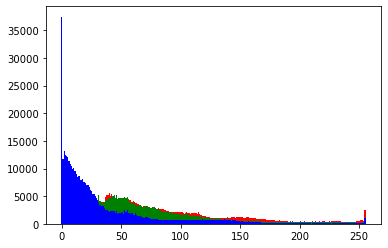

In [41]:
R, G, B = histogramRGBz2(path)

plt.bar(range(len(R)), R, width=1, color='red')
plt.bar(range(len(G)), G, width=1, color='green')
plt.bar(range(len(B)), B, width=1, color='blue')
plt.show()


475


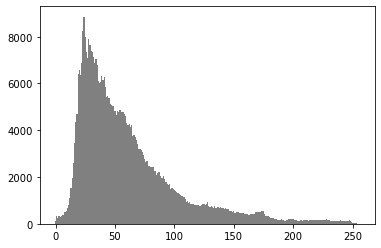

In [45]:
path = "./papuga.jpg"
img = Image.open(path)
arr = np.array(img)
data = RGBtoGSsavg(arr)
img2 = Image.fromarray(data)

RGB = histogramRGBz2GREY(img2)

plt.bar(range(len(RGB)), RGB, width=1, color='grey')
plt.show()

475


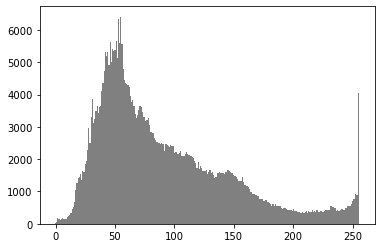

In [46]:
path = "./papuga.jpg"
img = Image.open(path)
arr = np.array(img)
data = RGBtoGSmax(arr)
img2 = Image.fromarray(data)

RGB = histogramRGBz2GREY(img2)

plt.bar(range(len(RGB)), RGB, width=1, color='grey')
plt.show()

475


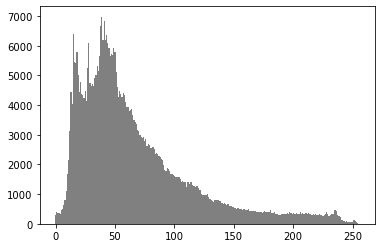

In [47]:
path = "./papuga.jpg"
img = Image.open(path)
arr = np.array(img)
data = RGBtoGSplum(arr)
img2 = Image.fromarray(data)

RGB = histogramRGBz2GREY(img2)

plt.bar(range(len(RGB)), RGB, width=1, color='grey')
plt.show()

475


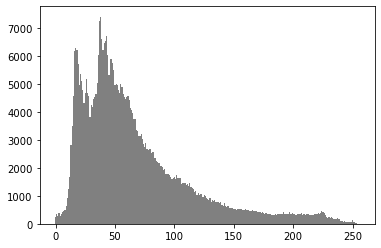

In [48]:
path = "./papuga.jpg"
img = Image.open(path)
arr = np.array(img)
data = RGBtoGSlgplum(arr)
img2 = Image.fromarray(data)

RGB = histogramRGBz2GREY(img2)

plt.bar(range(len(RGB)), RGB, width=1, color='grey')
plt.show()

475


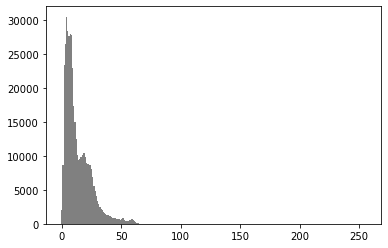

In [49]:
path = "./papuga.jpg"
img = Image.open(path)
arr = np.array(img)
data = RGBtoGSSaravanan(arr)
img2 = Image.fromarray(data)

RGB = histogramRGBz2GREY(img2)

plt.bar(range(len(RGB)), RGB, width=1, color='grey')
plt.show()